In [ ]:
# Customer Churn Prediction Using Logistic Regression and Random Forest

In [92]:
#1. Import all the necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

In [93]:
#2. Load the Data

file_path = r"C:\Users\Suhas\Downloads\Customer_Churn_Data_Large.xlsx"
xls = pd.ExcelFile(file_path)

demo = pd.read_excel(xls, "Customer_Demographics")
trans = pd.read_excel(xls, "Transaction_History")
service = pd.read_excel(xls, "Customer_Service")
online = pd.read_excel(xls, "Online_Activity")
churn = pd.read_excel(xls, "Churn_Status")

Demographics Info:
   CustomerID  Age Gender MaritalStatus IncomeLevel
0           1   62      M        Single         Low
1           2   65      M       Married         Low
2           3   18      M        Single         Low
3           4   21      M       Widowed         Low
4           5   21      M      Divorced      Medium

Churn distribution:
ChurnStatus
0    796
1    204
Name: count, dtype: int64


C:\Users\suhas\AppData\Local\Temp\ipykernel_22996\2153530481.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="ChurnStatus", data=churn, palette="coolwarm")


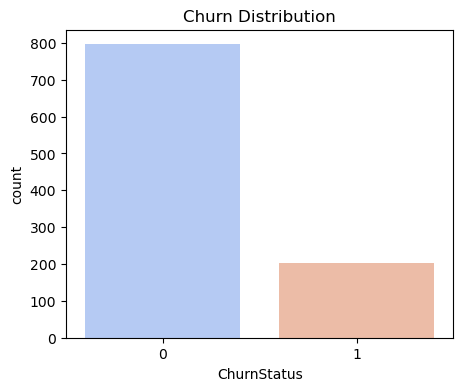

In [94]:
#3.  Exploratory Data Analysis
# Data analysis approach focused on investigating and summarizing the key characteristics of a dataset. 

print("Demographics Info:")
print(demo.head())

print("\nChurn distribution:")
print(churn["ChurnStatus"].value_counts())

# Plot churn distribution
plt.figure(figsize=(5,4))
sns.countplot(x="ChurnStatus", data=churn, palette="coolwarm")
plt.title("Churn Distribution")
plt.show()


In [95]:
#4.  Feature Analysis

# Aggregate transactions
trans_agg = trans.groupby("CustomerID").agg(
    total_spent=("AmountSpent", "sum"),
    avg_spent=("AmountSpent", "mean"),
    transaction_count=("TransactionID", "count")
).reset_index()

# Aggregate service
service_agg = service.groupby("CustomerID").agg(
    service_count=("InteractionID", "count")
).reset_index()

# Aggregate online
online_agg = online.groupby("CustomerID").agg(
    avg_login=("LoginFrequency", "mean")
).reset_index()

In [96]:
#5.  Merging All Sheets
df = demo.merge(churn, on="CustomerID", how="left")
df = df.merge(trans_agg, on="CustomerID", how="left")
df = df.merge(service_agg, on="CustomerID", how="left")
df = df.merge(online_agg, on="CustomerID", how="left")

In [97]:
#6. Encode Categorical Variables 
encoder = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = encoder.fit_transform(df[col].astype(str))

In [98]:
#7. Droping the data
X = df.drop(columns=["CustomerID", "ChurnStatus"])
y = df["ChurnStatus"]

# Fill missing values
X = X.fillna(0)   # or use median as shown above


In [99]:
#8. Splitting the Train-Test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [100]:
#9. Building Logistic Regression
#Logistic regression is a statistical method used for binary classification, 
#predicting the probability of a data point belonging to one of two classes (e.g., yes/no, true/false).

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)[:, 1]

print("===== Logistic Regression =====")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))



===== Logistic Regression =====
Confusion Matrix:
 [[159   0]
 [ 41   0]]
ROC-AUC Score: 0.5316766375210922

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       159
           1       0.00      0.00      0.00        41

    accuracy                           0.80       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.63      0.80      0.70       200



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

In [101]:
#10. Building Random Forest
#Random Forest is an ensemble learning method that builds and combines multiple decision trees 
#to make more accurate and stable predictions than a single decision tree. 

rf_model = RandomForestClassifier(random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("\n===== Random Forest =====")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))



===== Random Forest =====
Confusion Matrix:
 [[157   2]
 [ 40   1]]
ROC-AUC Score: 0.5184844301273202

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88       159
           1       0.33      0.02      0.05        41

    accuracy                           0.79       200
   macro avg       0.57      0.51      0.46       200
weighted avg       0.70      0.79      0.71       200



<Figure size 600x500 with 0 Axes>

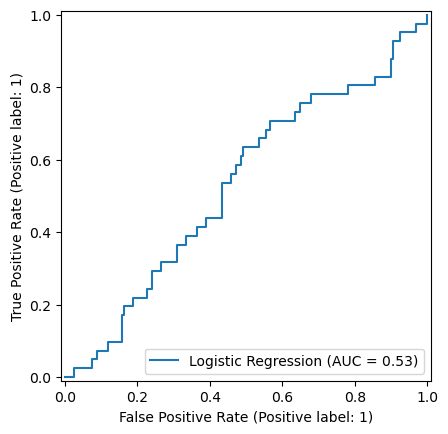

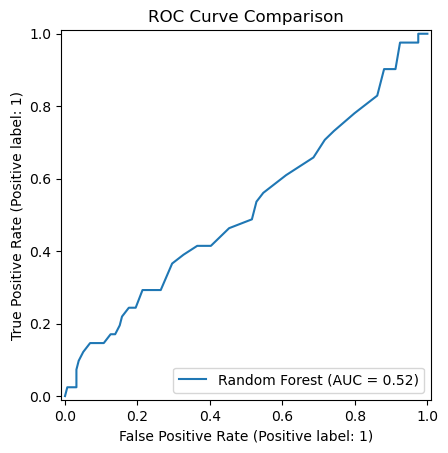

In [102]:
#11. ROC Curves for both models
#Receiver Operating Characteristic curve is a graphical plot that illustrates the performance of a 
#binary classification model at various threshold settings

plt.figure(figsize=(6,5))
RocCurveDisplay.from_estimator(log_model, X_test, y_test, name="Logistic Regression")
RocCurveDisplay.from_estimator(rf_model, X_test, y_test, name="Random Forest")
plt.title("ROC Curve Comparison")
plt.show()

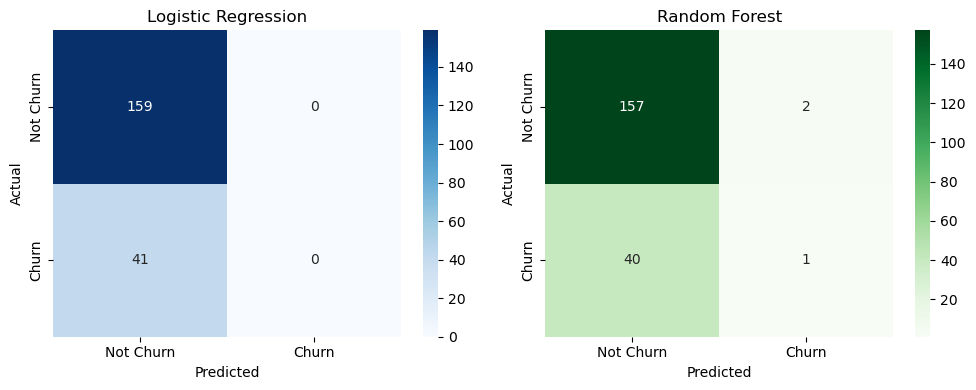

In [103]:
#12. Confusion Matrix Heatmap

fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap="Blues",
            xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"], ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap="Greens",
            xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"], ax=axes[1])
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

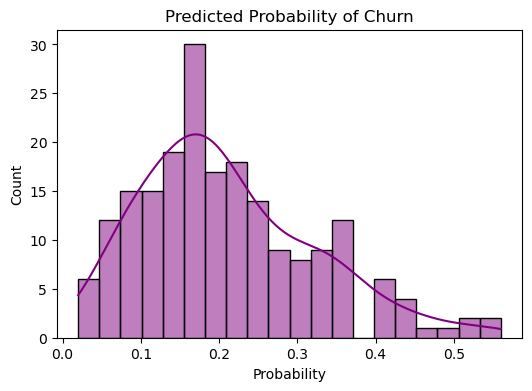

In [104]:
#13. Predicted Probability Distribution

plt.figure(figsize=(6,4))
sns.histplot(y_proba, bins=20, kde=True, color="purple")
plt.title("Predicted Probability of Churn")
plt.xlabel("Probability")
plt.ylabel("Count")
plt.show()




C:\Users\suhas\AppData\Local\Temp\ipykernel_22996\1239259768.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="viridis")


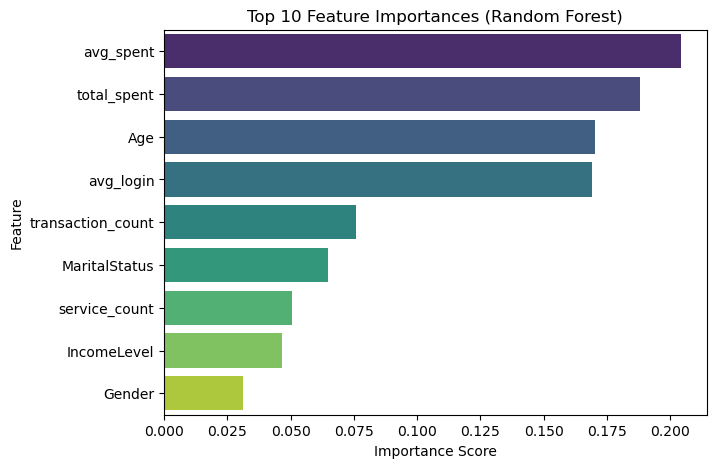

In [91]:
#14. Feature Importance for Random Forest

importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)
plt.figure(figsize=(7,5))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
